# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
# Kisilerin seker hastasi olup olmadigini arastiriyoruz.
# Kadinlar üzerinde arastirma yapilmis bir data
# 768 satirdan olusuyor.

# Pregnancies --> Kac defa hamilelik gecirdi
# Glucose --> Glikoz degeri
# Blood Pressure --> Kan basinci(Tansiyon) 
# Skin Thickness --> Deri Kalinligi
# Insulin --> insulin degerí
# BMI --> Vücut kitle endeksi
# Diabetes Pedigree Function-- Ailenizden gelen (irsi)  seker hastasi olma olasilgi
# Age --> Yas

In [6]:
# Bir imbalance(dengesiz) data ile ugrasabilmek bizi diger DS lerden ayiracaktir
# Recall max olmasini istiyoruz. Ama bu yeterli degil bizim icin Precission da olabildigince max olmasi 

## Exploratory Data Analysis and Visualization

In [5]:
df.info()  # Tüm column lar sayisal degerde ve missing value yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T  # sanki Insulin outlier ama seker hastaligindaki en önemli feature. domain knowledge önemli!

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Insulin de std > mean 
# Domain bilgisi lazim. Örnegin insulin = 700 oldugunda bunu Domain bilgisi olmazsa Outlier kabul edebilirdik. 
# Yani seker hastasi bir kisi icin insulin degeri 700 olabilir.

In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

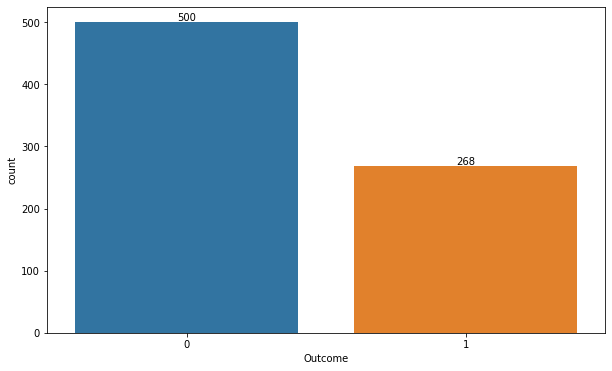

In [10]:
ax = sns.countplot(df.Outcome)
ax.bar_label(ax.containers[0]);

In [12]:
# Imbalance(Dengesizlik) var mi yok mu skorlara bakacagiz.

# 0 class 1 class ın neredeyse 2 katı. 
# class lar arasında bir dengesizlik var
# ama hemen imbalance muamelesi yapmayalım.
# score lara bakıp eğer skorlarda bir anormallik düşüklük yoksa bu şekilde devam edin.
# varsa imbalance datasetleri ile mücadele yöntemlerini uygulayın

##### tüm feature'lari tek tek inceliyorum

<AxesSubplot:xlabel='Pregnancies'>

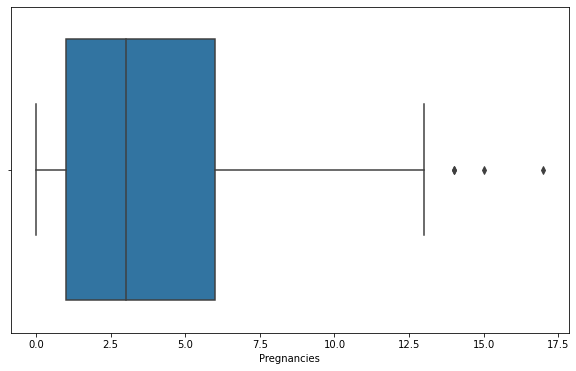

In [9]:
# Dogum sayisi fazla oldukca seker hastasi olma olasilgi artiyor.

sns.boxplot(df.Pregnancies)

In [15]:
#df=df[df.Pregnancies<13]

<AxesSubplot:xlabel='Pregnancies'>

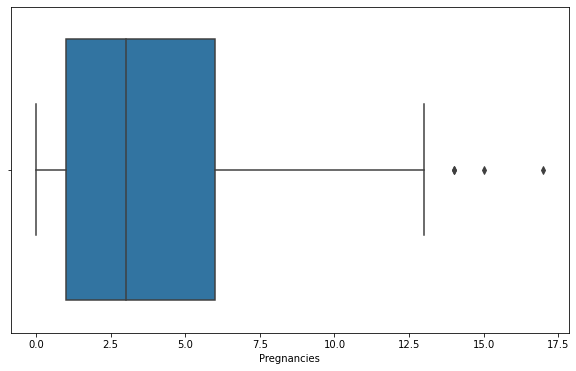

In [11]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='SkinThickness'>

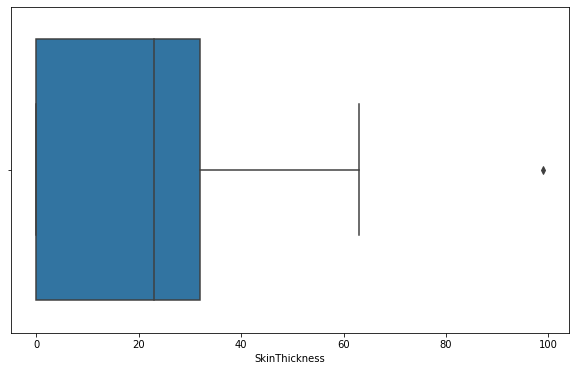

In [12]:
# Deri kalinligi en fazla 70 olabilirmis. Bu kesinlikle Outlier 10 girecekken 100 girilmis gibi. 

sns.boxplot(df.SkinThickness)

In [13]:
# Outlier degerimizi sildik.

df=df[df.SkinThickness<70]

<AxesSubplot:xlabel='SkinThickness'>

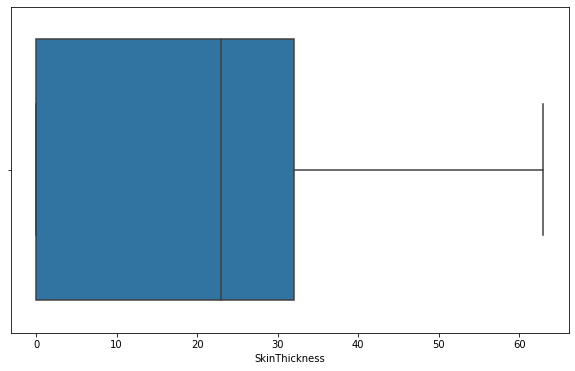

In [14]:
sns.boxplot(df.SkinThickness)

<AxesSubplot:xlabel='Insulin'>

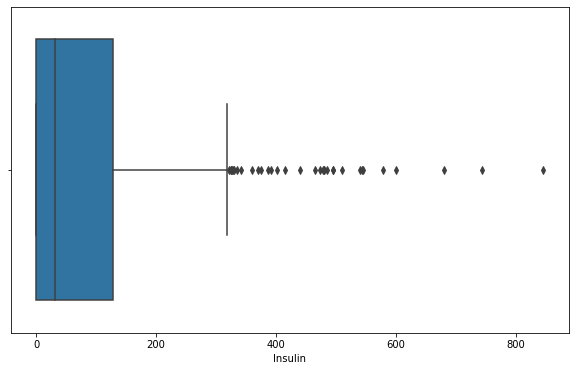

In [15]:
sns.boxplot(df.Insulin)  # outlier olsa da Insulin cok önemli. silmek istersem hem outlier hem outliersiz skor alinmali

# zaten diabet hastalarında insulin değeri çok yüksek olur. bu yüzden bu yüksek değerleri outlier olarak değerlendirmiyoruz.

<AxesSubplot:xlabel='Glucose'>

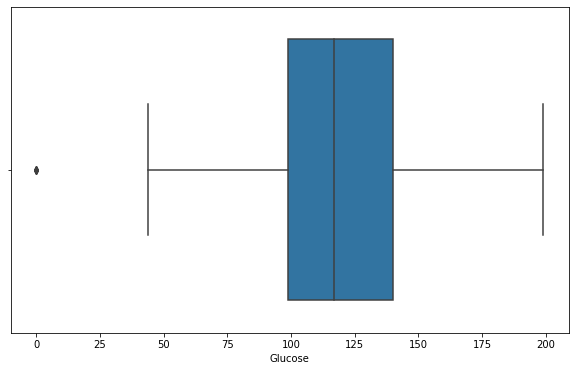

In [16]:
sns.boxplot(df.Glucose)

# şeker düzeyi kimsede 0 olamaz bu yüzden 0 altında olanları almıyoruz.
# Glucose hic bir zaman 0 olamaz. Sifirdan büyük olmalidir.

In [17]:
df=df[df.Glucose>0]

# glucose değeri 0 dan büyük olanları alıyoruz.
# Outlier sildik

<AxesSubplot:xlabel='Glucose'>

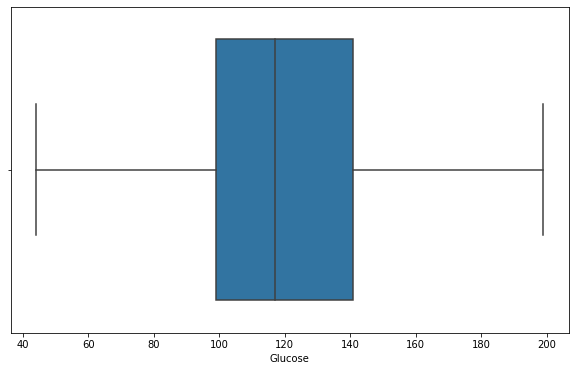

In [18]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

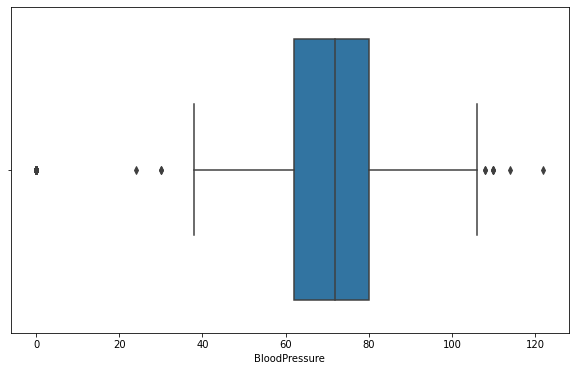

In [19]:
# Kan basinci 35 in altinda olursa ölüm gerceklesir.

sns.boxplot(df.BloodPressure)

In [20]:
# 35 altini sildik

df=df[df.BloodPressure>35]

<AxesSubplot:xlabel='BloodPressure'>

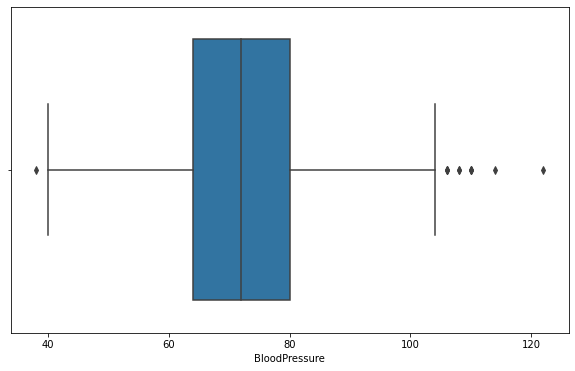

In [21]:
sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='BMI'>

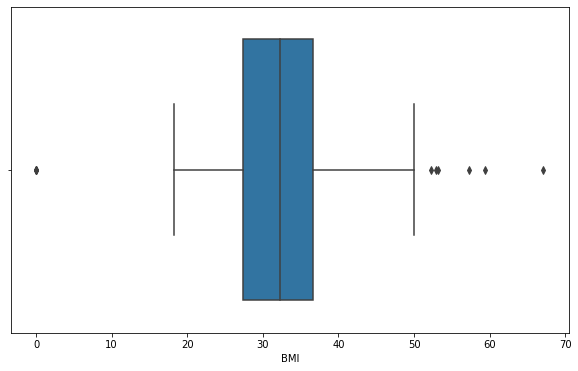

In [22]:
sns.boxplot(df.BMI)

# vücut kitle indeksi

In [23]:
# BMI <= 0  olamaz

df=df[df.BMI>0]

<AxesSubplot:xlabel='BMI'>

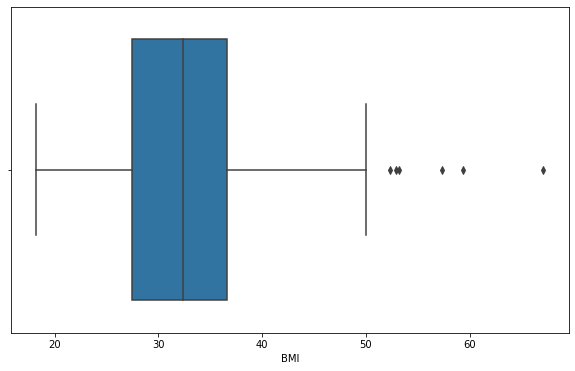

In [24]:
sns.boxplot(df.BMI)

In [25]:
# Data temizleme sonrasi 768 satirdan 720 satira düstü 

df.shape

(720, 9)

In [26]:
df.Outcome.value_counts()  # (500, 268)di

0    473
1    247
Name: Outcome, dtype: int64

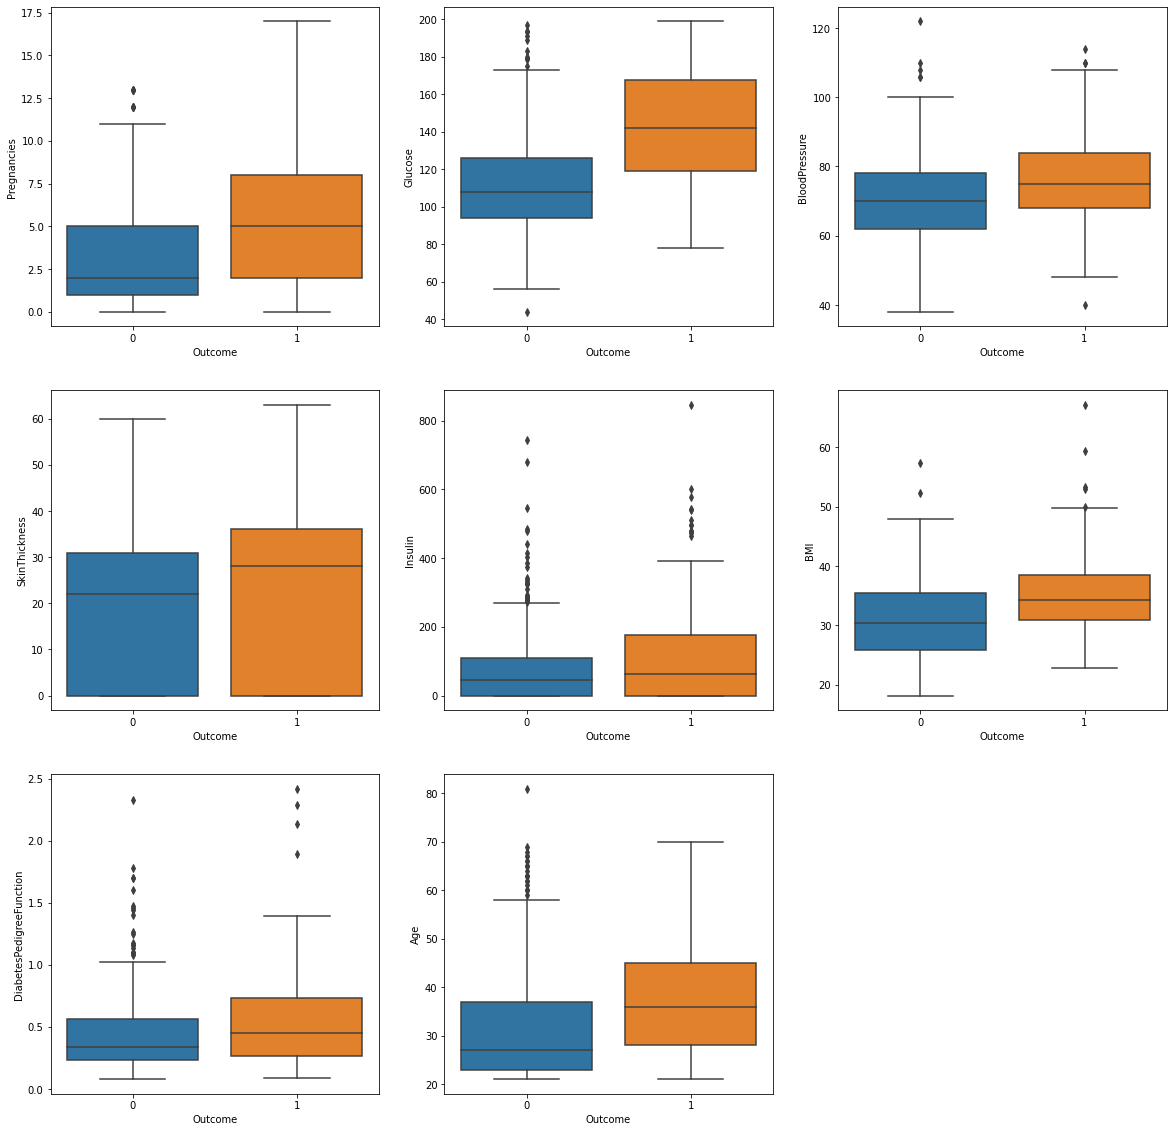

In [27]:
# Sütunlarla ile Outcome arasindaki boxplot grafik cizimi(Feature -Target iliskisi)

index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature, data=df)

<AxesSubplot:>

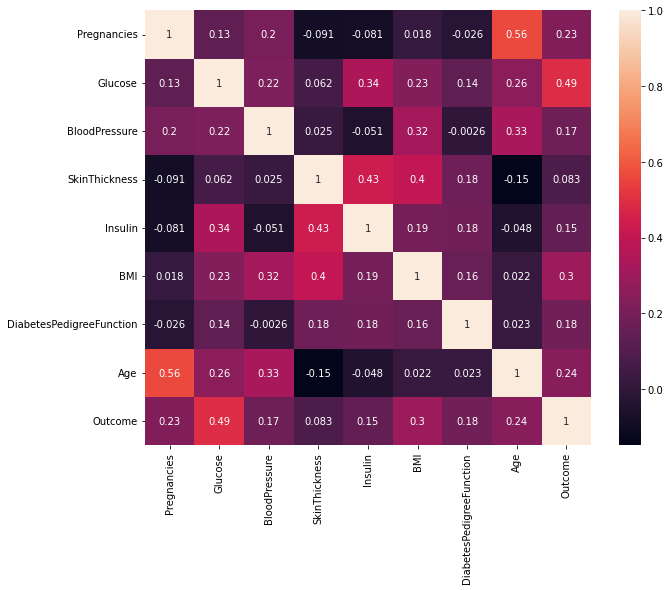

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)  # multicollinarty olsa bile LogisticRegression arka planda zaten onlara PENALTY muamelesi yaparak Ridge-LASSO calistiriyor

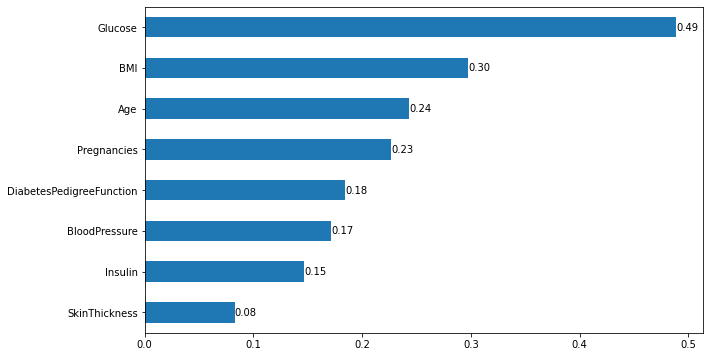

In [29]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()

ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()  # Outcome kendiyle olan corr görmek istemedim, zaten 1
ax.bar_label(ax.containers[0], fmt='%.2f');

# diğer feature ların outcome (target) a göre corr larına bakıyoruz. 
# kendi ile corr'u 1 olacağı için ona bakmaya gerek yok. 

# Logistic Reg. multicolineraty sikintisi yok arkada Ridge ve Lasso calisiyor

# ilk üc 
# Glucose, BMI ,Age

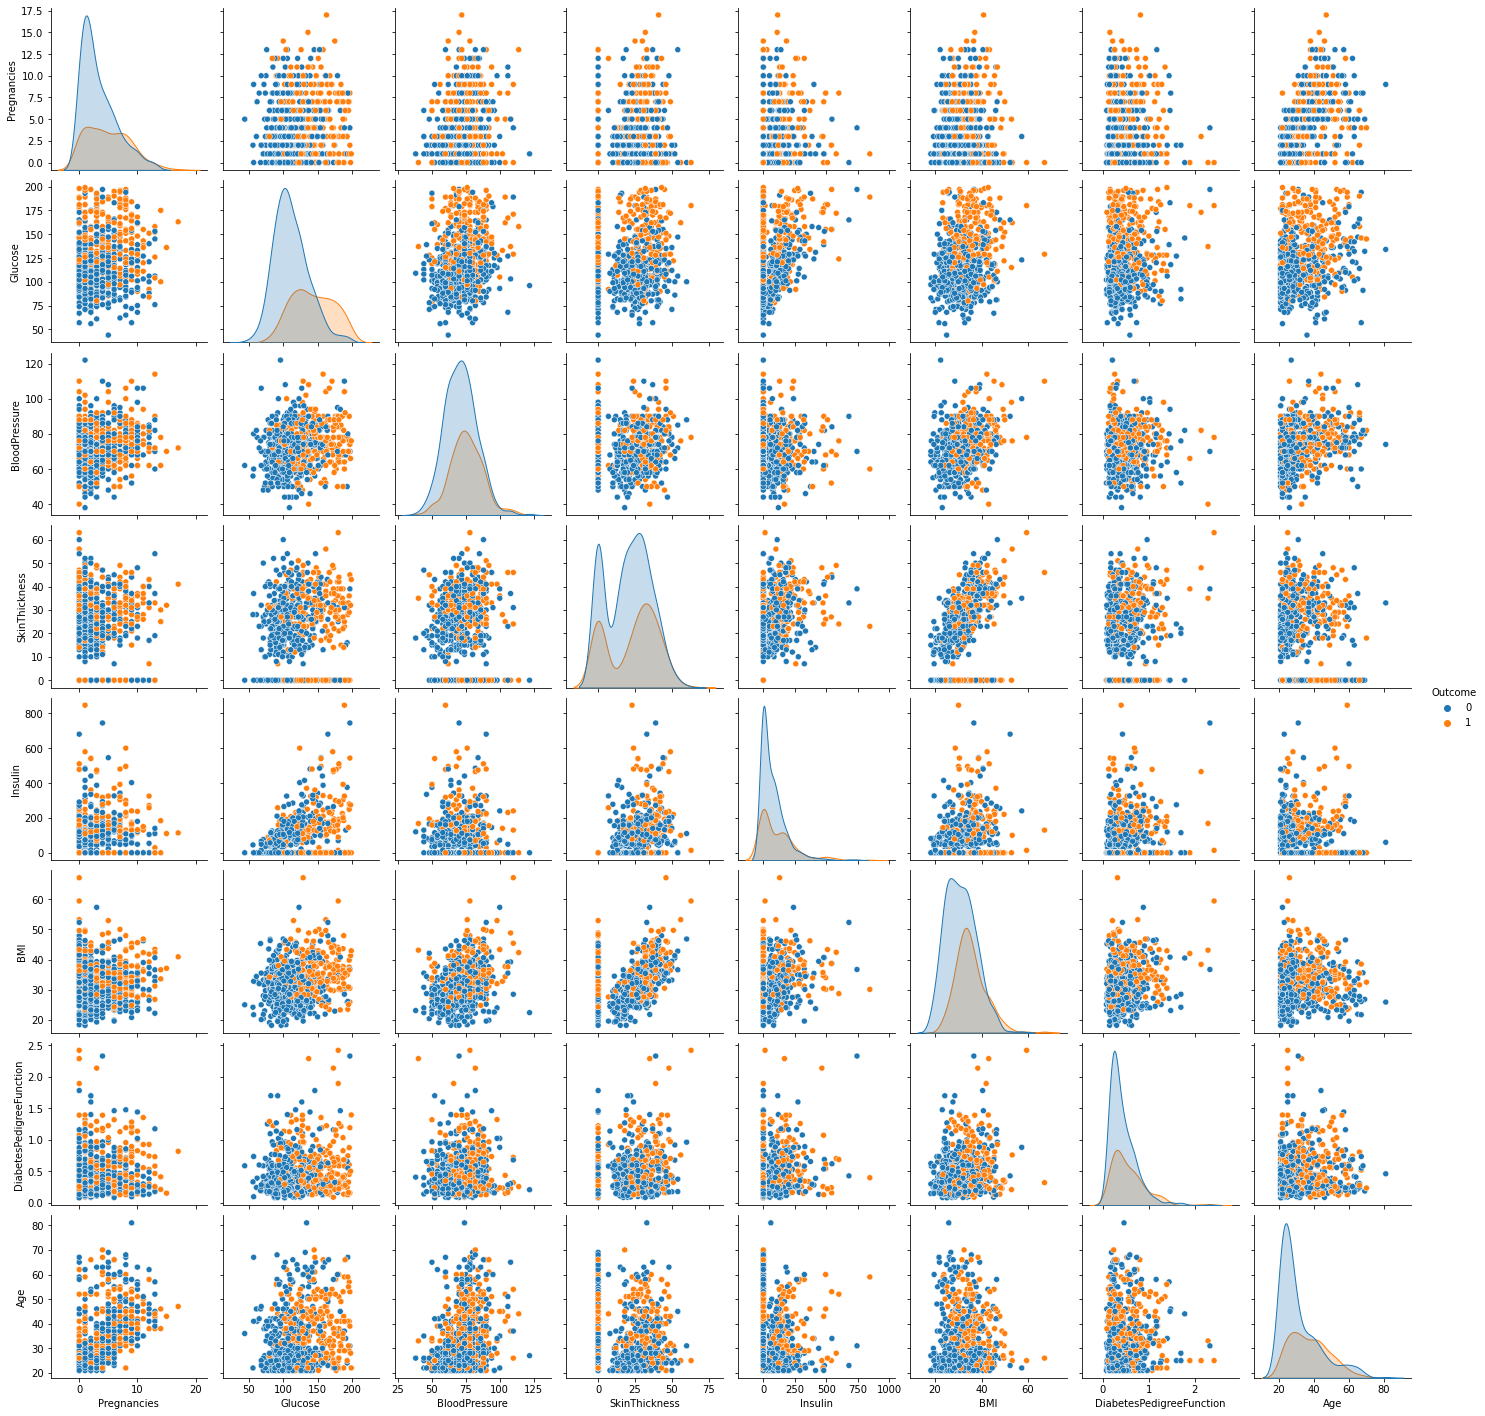

In [30]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split

In [31]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
# stratify=y dengesiz veri setlerinde KULLANILMALI, normallerinde de kullanilabilir

In [34]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

0    378
1    198
Name: Outcome, dtype: int64

0    95
1    49
Name: Outcome, dtype: int64


## Modelling with Pipeline

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# log_model = LogisticRegression(class_weight = "balanced")
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
# 'balanced' mode, giriş verilerindeki sınıf frekanslarıyla ters orantılı ağırlıkları otomatik olarak ayarlamak için y değerlerini kullanır.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [37]:
y_pred = pipe_model.predict(X_test)

In [38]:
y_pred_proba = pipe_model.predict_proba(X_test)

In [39]:
test_data = pd.concat([X_test, y_test], axis=1)  # test_data'yı geçici olarak kullancağım. amacım outcome ile predleri kıyaslamak.
test_data["pred"] = y_pred                       # test_datama pred değerlerimi ekliyorum
test_data["pred_proba"] = y_pred_proba[:,1]      # proba değerlerimi ekliyorum. 1 olma olasılıklarını kullanacağım dolayısıyla listedeki 2. elemanları aldım.
test_data.sample(10)                             # 0.5 üzeri 1'e, alti 0'a atandi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
434,1,90,68,8,0,24.5,1.138,36,0,0,0.084349
0,6,148,72,35,0,33.6,0.627,50,1,1,0.706185
767,1,93,70,31,0,30.4,0.315,23,0,0,0.071627
114,7,160,54,32,175,30.5,0.588,39,1,1,0.730903
559,11,85,74,0,0,30.1,0.300,35,0,0,0.183009
562,1,87,68,34,77,37.6,0.401,24,0,0,0.109798
46,1,146,56,0,0,29.7,0.564,29,0,0,0.427996
70,2,100,66,20,90,32.9,0.867,28,1,0,0.185372
147,2,106,64,35,119,30.5,1.400,34,0,0,0.275102
526,1,97,64,19,82,18.2,0.299,21,0,0,0.024679


## Model Performance on Classification Tasks

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [52]:
# 1 labelinin skorlari kötü oldugu icin imbalance müdahelesi gerekiyor
# REcall --> 0,8 0,9 olmali ve precision da artmali örnek precision --> 0.2 ve ya 0.3
# Amacimiz max REcall ile max Precision
# Test skoru train den daha iyi

In [42]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



In [54]:
# amaç max recall ile max precision

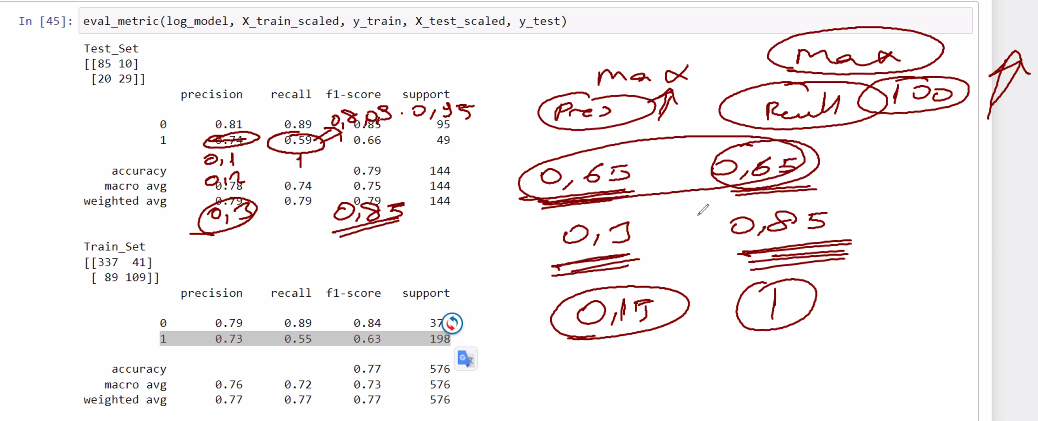

## Cross Validate

In [43]:
from sklearn.model_selection import cross_validate

In [44]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations) #cross val. yaparken baştan yeni bir model objecti oluşturuyorum

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.004090,0.003233,0.600000,0.718310,0.450000,0.573034,0.514286,0.637500,0.706897,0.776062
2,0.003999,0.003125,0.642857,0.744526,0.450000,0.573034,0.529412,0.647619,0.724138,0.785714
3,0.005015,0.003003,0.923077,0.717557,0.600000,0.528090,0.727273,0.608414,0.844828,0.766409
4,0.005615,0.003411,0.857143,0.716418,0.600000,0.539326,0.705882,0.615385,0.827586,0.768340
5,0.004425,0.004002,0.705882,0.727941,0.600000,0.556180,0.648649,0.630573,0.775862,0.776062
6,0.004534,0.004208,0.647059,0.727941,0.550000,0.556180,0.594595,0.630573,0.741379,0.776062
7,0.004009,0.002999,0.714286,0.723881,0.526316,0.541899,0.606061,0.619808,0.771930,0.770713
8,0.005986,0.003089,0.647059,0.719424,0.578947,0.558659,0.611111,0.628931,0.754386,0.772640
9,0.005992,0.003540,0.733333,0.698529,0.550000,0.533708,0.628571,0.605096,0.771930,0.761079
10,0.004004,0.003990,0.625000,0.729927,0.500000,0.561798,0.555556,0.634921,0.719298,0.778420


In [45]:
df_scores.mean()[2:]

test_precision     0.709570
train_precision    0.722445
test_recall        0.540526
train_recall       0.552191
test_f1            0.612139
train_f1           0.625882
test_accuracy      0.763823
train_accuracy     0.773150
dtype: float64

In [46]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)  # skorlar genel olarak birbirine yakin

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate for 0 class

In [48]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [49]:
from sklearn.metrics import make_scorer  # 0 label' icinde skorlari görmek istersem make_scorer kullaniyorum
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)  # 0 labeli icin f1 skoru
precision_0 = make_scorer(precision_score, pos_label =0) # 0 labeli icin precision skoru
recall_0 = make_scorer(recall_score, pos_label =0) # 0 labeli icin recall skoru

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0} # mutlaka dictionary icinde verilmelidir.

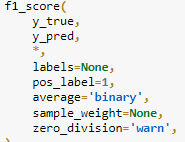

In [50]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,train_precision_0,test_recall_0,train_recall_0,test_f1_0,train_f1_0
1,0.006535,0.003809,0.744186,0.797872,0.842105,0.882353,0.790123,0.837989
2,0.005195,0.003002,0.750000,0.800525,0.868421,0.897059,0.804878,0.846047
3,0.006510,0.003002,0.822222,0.782946,0.973684,0.891176,0.891566,0.833563
4,0.004503,0.004498,0.818182,0.786458,0.947368,0.888235,0.878049,0.834254
5,0.005016,0.003086,0.804878,0.793194,0.868421,0.891176,0.835443,0.839335
6,0.006283,0.004001,0.780488,0.793194,0.842105,0.891176,0.810127,0.839335
7,0.004001,0.004058,0.790698,0.787013,0.894737,0.891176,0.839506,0.835862
8,0.005046,0.003463,0.800000,0.792105,0.842105,0.885294,0.820513,0.836111
9,0.005876,0.002941,0.785714,0.783290,0.891892,0.879765,0.835443,0.828729
10,0.004614,0.003937,0.756098,0.795812,0.837838,0.891496,0.794872,0.840941


In [51]:
df_scores.mean()[2:]

test_precision_0     0.785247
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.830052
train_f1_0           0.837217
dtype: float64

In [52]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## GridSearchCV

In [53]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [67]:
# En cok kullandgimiz hyperparameter
# penalty ; Feature selection kullanmak icindeki  l1
# icinde elastic kullanmak icin manuel olarak l1 ve l2 degisitirilmelidir.
 
# c parametresi bildigimiz alpha , alpha büyüdükce büyük regularization uygular,
# Ama c alphanin tam tersi sekilde calisir. c kücüldükce büyük regularization uygular

# class_weight : balance ayari
    # Örnek 1- 100 , 0 -20000 elimde data var.
    # tahmin ediyorum. Model muallakta kaldigi kisimlarda 
    # elimdeki dataya göre 1 in  genel dataya göre orani (100/20100)0,01; 0 in %99.9
    # balance etmek icin 
    # 100 / 20000 arada 1 e 200 orani var. 0 icin ß0*1 ; 1 icin ß1*200 yapip balance ediyor
    # class weight :{1:200 , 0:1} manuel olarak yaziyoruz.
    
# solver :optimizasyon icin kullaniliyor. Modelimizin hatasini(OLS) optimize(minimize) etmek icin
# default 'lbfgs' yeterli oldugu belirtiliyor. Genellikle iyi sonuclar aliyor.
# Kücük datalar 'liblinear' tavsiye ediliyor, ama kesinlik yoktur.
# Büyük datalarda 'sag' 'saga' daha hizli calisiyor.

# random_state : Eger solver : 'sag' ,'saga' veya 'liblinear' ise random_state yazilmalidir.

# multi_class;

# 0--10 , 1--200, 2--250
# multinomial :0 sifir sinifina  aliyor. 1 ve 2 yi de 1 sinfina aliyor
# ovr :one versus rest (binary)


In [54]:
pipe_model.get_params()  # pipe_model kullanacaksam parametre isimlerini nasil yazmam gerektigini gördüm

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [55]:
pipe_model.set_params(logistic__C= 1)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=1))])

In [56]:
 pipe_model.get_params()  # logistic__C= 1 yaptim 1.0di

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(C=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [57]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None] 

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data

# "Dengeli" mod, ağırlıkları sınıf frekanslarıyla ters orantılı olarak otomatik olarak ayarlamak için y değerlerini kullanır
# giriş verilerinde

solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,  # LogisticRegression icinde penalty diyordum ama pipe_model ile logistic__penalty
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True) # islemi hizlandirmak icin

#f1_0 = make_scorer(f1_score, pos_label =0) ( 1 labelinin recalini iyilestirecek)

grid_model. best_estimator_ #default degeri döndürmez, sadece degismis olanlari döndürür,estimator :logisticregression demek #bunu kullanmanin yazimi daha kolay, l1 lasso #hatalarin min edildigi yer solver da var #c parametresi kücük c daha büyük reg degeri uyguluyor, büyük c daha kücük reg degeri uygular #bir dengesizlik varsa balanced i mutlaka kullanmaliyim o kurtarmasa c ile oynayacagiz, sonra manuel olarak oynayacagiz #solver sag ve saga ise random state kullanmaliyim #multi class her siniftan aldiginin ortalamasini verir, hepsini döndürür #multinominal class lari karsilastirip her bir sinifin ortalamasini alir, her birine bir olasilik döndürür en büyügü alir #sag saga büyük datalarda daha hizli sonuc döndürür #default l2 #l1 elastic net kullaniliyorsa alinacak deger #en cok solver, class weight ve c ile ugrasilacak

In [58]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [59]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [60]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [61]:
grid_model.best_index_

17

In [75]:
pd.DataFrame(grid_model.cv_results_).loc[17, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.746667
mean_train_score    0.754012
Name: 17, dtype: object

In [76]:
grid_model.best_score_ # 1 labelinin recall skoru

0.7466666666666666

In [77]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

#recall artikca precision azalir.tam tersi de olabilir.
#recall  artti , precision azaldi. PRecision 0.74 den 0.65 e, recall 0.73 e yükseldi

Test_Set
[[71 27]
 [13 33]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        98
           1       0.55      0.72      0.62        46

    accuracy                           0.72       144
   macro avg       0.70      0.72      0.70       144
weighted avg       0.75      0.72      0.73       144


Train_Set
[[282  93]
 [ 50 151]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       375
           1       0.62      0.75      0.68       201

    accuracy                           0.75       576
   macro avg       0.73      0.75      0.74       576
weighted avg       0.77      0.75      0.76       576



https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [78]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weight = {0: class_weights[0], 1:class_weights[1]}
# class_weight

In [79]:
# recall skorunun daha artmasi icin ROC ve AUC uygulama lazim.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [80]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

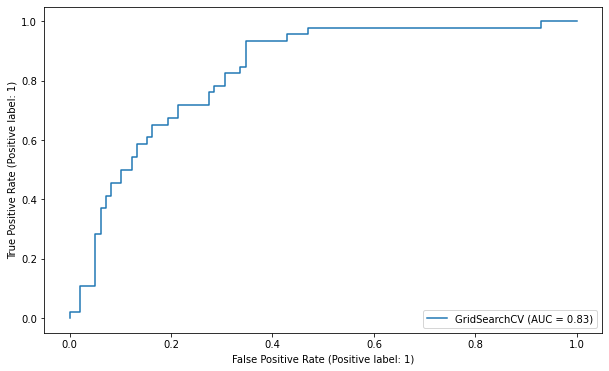

In [81]:
plot_roc_curve(grid_model, X_test, y_test);

In [82]:
# DAtam dengesiz. 86 degil 78 dir skor.

## Precision Recall Curve

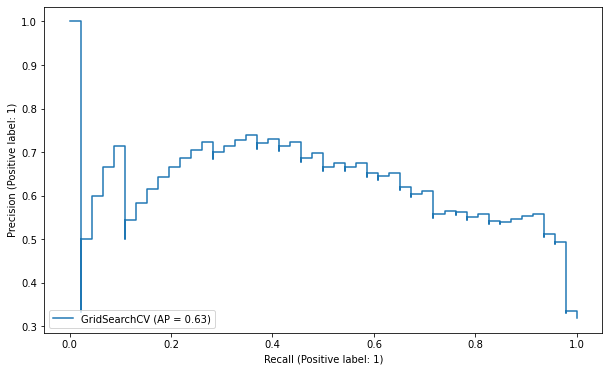

In [83]:
plot_precision_recall_curve(grid_model, X_test, y_test);

## Finding Best Threshold

In [84]:
# Best Threshold bulurken 
# 1. X_train de yapiyoruz.
# 2. Parametrelerle oynanmamis default dengeli hale getirilmemis modeli kullaniyorum

# modelim dengeli oldugundan  best thrsd bulmak icin 0.5 etrafinda bulunur. Buldugumuz skorlardan iyi bir sey ypamaz.

In [85]:
# plot_roc_curve(log_model, X_train_scaled, y_train);

# Dikkat! aşağıdaki grafik 1 olma durumuna göre çizildi.

# Öncelikle ROC CURVE TRAIN DATA ile çizilir
# GridSearch ile class_weight kullanmıştık. class_weight kullanıulırsa THRESHOLD hep 0.5 civarı çıkar
# Bu nedenle CLASS_WEIGHT kullanılmamış modelimi kullanıyorum

In [86]:
# TPR =1 ve FPR = 0 --> TPR max, FPR min 
# TPR - FPR  max noktayi bulursa  best thrhold u buluruz.

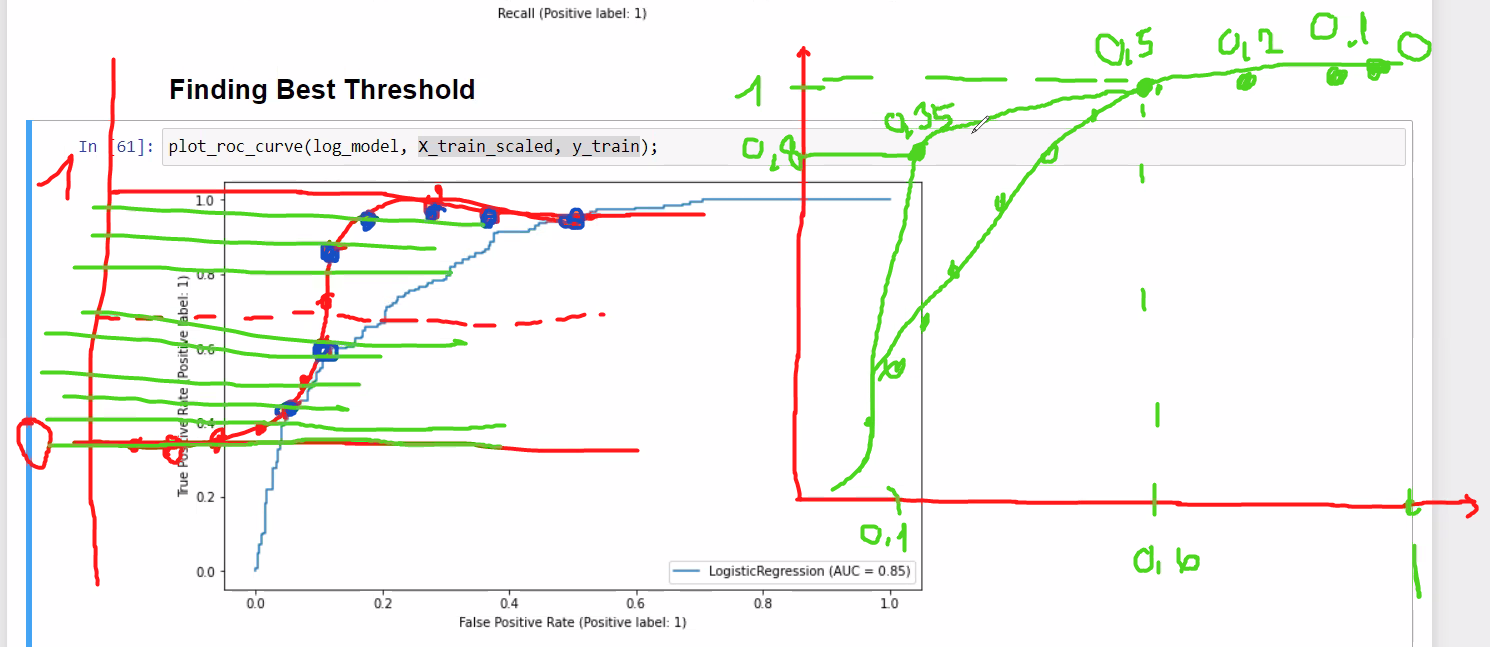

In [87]:
# y_pred_proba = log_model.predict_proba(X_train_scaled)  

# predict_proba: prediction ımın 1 ve 0 olma olasılıklarını veriyor.

# roc_auc_score(y_train, y_pred_proba[:,1]) # --> her zaman 1 class a ait proba veriyorum. pos_label ile oynanmışsa buna göre değiştir.

# True pos.rate-False Pos.rate curve grafiğindeki AUC=0.85 değerinin teyidi maksadıyla roc_auc_score() fonksiyonu kullanılarak bu değer tekrar bulundu.

In [88]:
# fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [89]:
# roc_curve(y_train, y_pred_proba[:,1])

# fp_rate, tp_rate, thresholds için 3 tane array döndürdü

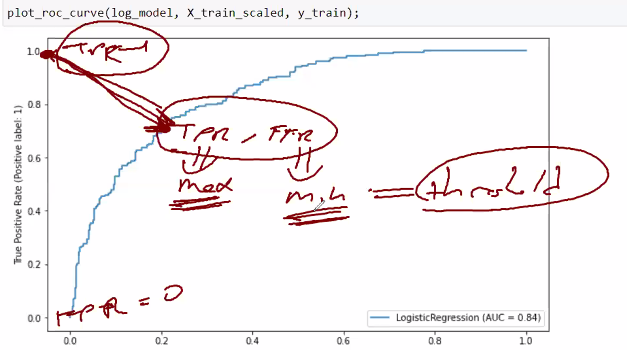

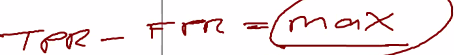

In [90]:
# Amaç TPR nin MAX, FPR nin ise MIN olduğu noktayı bulmak
# Burada fark MAX oluyor
# Bu noktanın index ini buluyorum
# Ardından bu indexe ait optimal threshold değerini alıyorum.


In [91]:
# optimal_idx = np.argmax(tp_rate - fp_rate)  # index değerini veriyor. kaç numaralı index en iyi thresholdun olduğu index.
# optimal_threshold = thresholds[optimal_idx]  # bu indeksteki threshold yani best threshold değerim.
# optimal_threshold

In [92]:
# optimal_idx

In [93]:
# manuel olaraak yaptik

# dict = {"tp_rate":tp_rate, "fp_rate":fp_rate, "tp_rate-fp_rate":tp_rate-fp_rate, "threshold":thresholds}
# pd.DataFrame(dict)

In [94]:
# pd.DataFrame(dict).sort_values(by="tp_rate-fp_rate", ascending=False)

In [95]:
# test_data.head()

# birazdan bu tabloya bir sütun daha oluşturacağım ve ona pred_2 diyeceğim. bu benim yukarda bulduğum best threshold değerine göre sonuçları verecek.

In [96]:
# test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [97]:
# test_data.sample(10)

In [98]:
# y_pred2 = test_data["pred2"]

In [99]:
# print(confusion_matrix(y_test,y_pred2))
# print(classification_report(y_test,y_pred2))

In [100]:
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [101]:
# plot_precison_recall dan da best threshold bulabilirz.

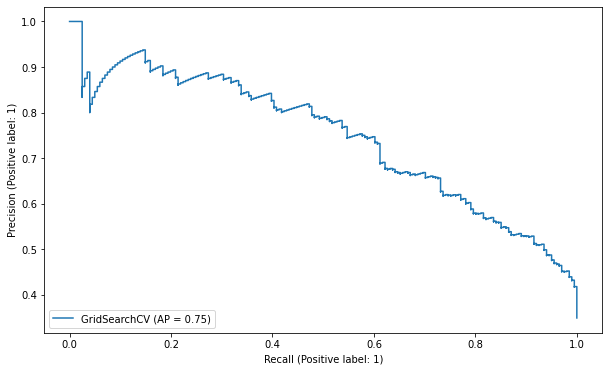

In [102]:
plot_precision_recall_curve(grid_model, X_train, y_train);

In [103]:
y_pred_proba = grid_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

# plot_precision_recall_curve() ile bulduğum AP = 0.73 değerini teyid etmek için average_precision_score() fonk. kullandım.

0.7455075931735855

In [104]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [105]:
thresholds

array([0.04248835, 0.04526317, 0.05035114, 0.05286673, 0.05705074,
       0.06240293, 0.06303246, 0.07116658, 0.0733098 , 0.08312078,
       0.08347789, 0.0835158 , 0.08463282, 0.08860698, 0.09268999,
       0.0934192 , 0.09684047, 0.09707081, 0.09709096, 0.09800887,
       0.0980276 , 0.09841285, 0.0985662 , 0.09892437, 0.09938905,
       0.09939577, 0.09961712, 0.10108621, 0.10250542, 0.10310305,
       0.10578543, 0.10635908, 0.10642917, 0.10790712, 0.10840729,
       0.11004296, 0.11040161, 0.11121225, 0.11186275, 0.11242215,
       0.11260838, 0.11400042, 0.11694278, 0.11939236, 0.12086738,
       0.12135561, 0.12213711, 0.12452784, 0.12520805, 0.12645053,
       0.1276011 , 0.12952536, 0.13217227, 0.13244172, 0.13264099,
       0.13355116, 0.13413336, 0.13460316, 0.13530715, 0.13676528,
       0.13691876, 0.13818279, 0.13955941, 0.1399739 , 0.14003838,
       0.14211386, 0.14457821, 0.14469356, 0.1449889 , 0.14819688,
       0.14967688, 0.15170575, 0.15252075, 0.15444753, 0.15554

In [106]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
pd.DataFrame(dict)

,precisions,recalls,threshold
0,0.348958,1.000000,0.042488
1,0.349565,1.000000,0.045263
2,0.350174,1.000000,0.050351
3,0.350785,1.000000,0.052867
4,0.351399,1.000000,0.057051
...,...,...,...
571,1.000000,0.024876,0.965098
572,1.000000,0.019900,0.966054
573,1.000000,0.014925,0.970531
574,1.000000,0.009950,0.971195


In [107]:
optimal_threshold = 0.224454

In [108]:
# optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
# optimal_threshold = thresholds[optimal_idx]
# optimal_threshold

# benim precision ile recall arasındaki ilişkiyi veren zaten bir skorum var (f1_score). 
# dolayısıyla burada f1_score denklemini--> (2 * precisions * recalls) / (precisions + recalls) kullandım.

# f1 scorun MAX olduğu yerin indexini buluyor
# bu index e ait optimal_threshold değerini alıyor

In [109]:
# optimal_idx

In [110]:
# 1 sinifina ait olma olasliklari
# amac grid.model in skorlarini iyi hale getirmek icin 

class_1_proba = grid_model.predict_proba(X_test)[:,1]
class_1_proba

array([0.34368091, 0.54691444, 0.25980476, 0.89622438, 0.54807299,
       0.53707443, 0.51059786, 0.1859646 , 0.34433501, 0.27654147,
       0.81305188, 0.58259783, 0.96451365, 0.71998666, 0.55323013,
       0.10962562, 0.67727091, 0.16317909, 0.17838501, 0.98994843,
       0.36190519, 0.302363  , 0.55745077, 0.2720186 , 0.2752335 ,
       0.70808935, 0.28993769, 0.12078311, 0.77257708, 0.49817078,
       0.20011458, 0.38175491, 0.75433275, 0.51636451, 0.48398974,
       0.03959372, 0.42454479, 0.83734505, 0.20539162, 0.28581597,
       0.86497953, 0.12844283, 0.83729427, 0.19074897, 0.99291255,
       0.16728476, 0.09368673, 0.23640254, 0.70413965, 0.60464267,
       0.30403782, 0.1576775 , 0.26138737, 0.23815156, 0.44081459,
       0.83131776, 0.194949  , 0.77298421, 0.48786552, 0.14939368,
       0.31870714, 0.90164046, 0.28212106, 0.33303045, 0.70892499,
       0.09929558, 0.44832708, 0.55197762, 0.19009454, 0.0914516 ,
       0.88233534, 0.62960452, 0.05080214, 0.96155038, 0.97466

In [111]:
# Array den series e cevirdim apply uygulamak icin

y_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba]

In [112]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[34 64]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.97      0.35      0.51        98
           1       0.41      0.98      0.58        46

    accuracy                           0.55       144
   macro avg       0.69      0.66      0.55       144
weighted avg       0.79      0.55      0.53       144



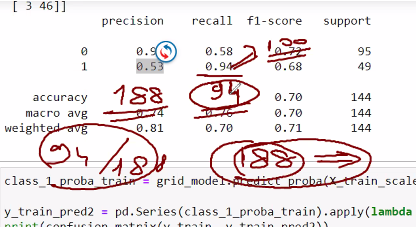

In [113]:
# recall 73 den 94 e cikti
# örnegin; 100 hastadan 94 ünü dogru tahmin ettim.
# 188 tahmin icinden

# eger müsteri recall = 1 isterse optimal_threshold manuel olarak oynanilir.
# Recall artar ama precision azalir.

In [114]:
# is bitmedi, CV yapilacak.
# manuel CV uyguluyoruz.

In [115]:
class_1_proba_train = grid_model.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[125 250]
 [  3 198]]
              precision    recall  f1-score   support

           0       0.98      0.33      0.50       375
           1       0.44      0.99      0.61       201

    accuracy                           0.56       576
   macro avg       0.71      0.66      0.55       576
weighted avg       0.79      0.56      0.54       576



In [116]:
# CROSS VALIDATION yapılmamış hiçbir skor sağlıklı değildir.
# Bu nedenle aldığımız her ilkel skor dan sonra mutlaka CV yapmalıyız.

In [117]:
from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224454):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True) # index ler karışık gittiği için reset yapıldı. index ler karışık olursa CV yapamaz
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')

In [118]:
# Data Leakage olmamasi icin yeni model olusturuyoruz. Parametreleri GridSearch tan aldik, faydalandik.

model = LogisticRegression(C=0.1, class_weight='balanced',penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

# Normalde son çalıştırdığımız model GRIDSEARCH sonunda best parametrelerle çalıştırdığımız modeldi.
# grid_model hem train hem de test setini gördüğü için burada onu kullanmıyorum
# burada modeli sıfırlayarak gridsearch sonunda aldığım best parametrelerle yeni bir model oluşturuyorum.

Accuracy           42.36%  std 4.25%

Test_Precision-1   37.59%  std 1.86%
Train_Precision-1  37.90%  std 0.43%

Test_Recall-1      98.02%  std 2.42%
Train_Recall-1     98.45%  std 0.33%

Test_F1_score-1    54.32%  std 2.19%
Train_F1_score-1   54.73%  std 0.44%


In [119]:
a = pd.DataFrame({"xyz":[1,2,3,4,5,6,7,8,9,10,11,1,13,14,15,16,17,18,19,20]}, index=range(10,30))
b = pd.Series([0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1], index=range(10,30))

In [120]:
# Yukarda DEF içersinde aşağıda yazılı kodlar ne yapıyor? Bunun için bu CELL çalıştırıldı.

skf = StratifiedKFold(n_splits = 10)
for train_index, test_index in skf.split(a, b):
    print(train_index, test_index)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1]
[ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2 3]
[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [4 8]
[ 0  1  2  3  4  6  7  8 10 11 12 13 14 15 16 17 18 19] [5 9]
[ 0  1  2  3  4  5  7  8  9 11 12 13 14 15 16 17 18 19] [ 6 10]
[ 0  1  2  3  4  5  6  8  9 10 12 13 14 15 16 17 18 19] [ 7 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 15 16 17 18 19] [12 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 16 17 18 19] [13 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19] [16 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18] [17 19]


## Final Model and Model Deployment

In [121]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [122]:
# localime kaydediyorum

import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

# X değerlerimin scale ile fit edilmiş halini scaler_diabetes te sakladım.

In [123]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [124]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,720.0,3.880556,3.366308,0.000,1.000,3.000,6.0000,17.00
Glucose,720.0,121.897222,30.649311,44.000,100.000,117.000,142.0000,199.00
BloodPressure,720.0,72.588889,12.075234,38.000,64.000,72.000,80.0000,122.00
SkinThickness,720.0,21.287500,15.476731,0.000,0.000,24.000,33.0000,63.00
Insulin,720.0,84.676389,117.276853,0.000,0.000,48.000,132.0000,846.00
BMI,720.0,32.424167,6.842008,18.200,27.475,32.350,36.6000,67.10
DiabetesPedigreeFunction,720.0,0.474885,0.333024,0.078,0.245,0.378,0.6295,2.42
Age,720.0,33.338889,11.737350,21.000,24.000,29.000,41.0000,81.00


In [125]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [126]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.0,0.38,29
1,6,140,80,33,132,36.5,0.63,40
2,5,120,75,25,55,34.0,0.45,33


In [127]:
sample_2 = sample.copy()

In [128]:
new_model.predict(sample)

array([0, 1, 0], dtype=int64)

In [129]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [130]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.22
0,3,117,72,23,48,32.0,0.38,29,0.367638,0,1
1,6,140,80,33,132,36.5,0.63,40,0.756714,1,1
2,5,120,75,25,55,34.0,0.45,33,0.497459,0,1


## New Predictions for optimal_threshols

In [131]:
def predict(model, X_test, optimal_threshold = 0.224454):
    
    predict_proba = model.predict_proba(X_test)
    
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    
    return prediction

In [132]:
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.22
0,3,117,72,23,48,32.0,0.38,29,0.367638,0,1
1,6,140,80,33,132,36.5,0.63,40,0.756714,1,1
2,5,120,75,25,55,34.0,0.45,33,0.497459,0,1


In [133]:
sample_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.0,0.38,29
1,6,140,80,33,132,36.5,0.63,40
2,5,120,75,25,55,34.0,0.45,33


In [134]:
y_pred = final_model.predict(sample_2)
y_pred

array([0, 1, 0], dtype=int64)

In [135]:
y_pred = predict(final_model, sample_2)
y_pred

[1, 1, 1]